In [1]:
import matplotlib.pyplot as pl
import numpy as np
import skope
%matplotlib inline

# Stellar Light Curves

Initialize star object by calling skope.Target( ). By default, Target( ) uses the motion vectors of the target EPIC ID: 205998445, a fairly standard C3 *K2* target. This can be changed with the $\texttt{ID}$ parameter.  

The GenerateLightCurve( ) function takes a stellar magnitude and returns a full light curve ($\texttt{fpix}$), a 1-dimensional flux light curve ($\texttt{flux}$), and a light curve containing the error in each pixel ($\texttt{ferr}$).

In [2]:
star = skope.Target()
fpix, flux, ferr = star.GenerateLightCurve(12.)

100%|██████████| 1000/1000 [00:49<00:00, 20.39it/s]


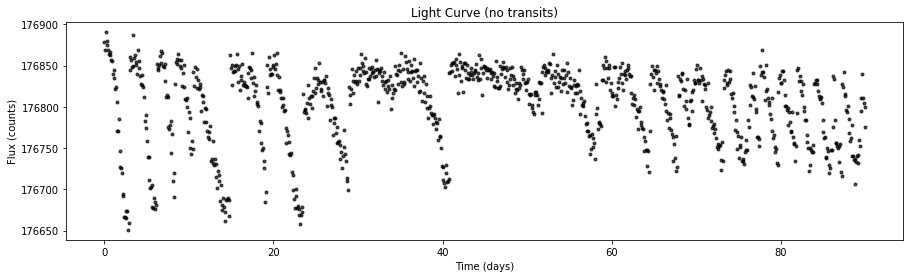

In [3]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,flux,'k.', alpha=.7);
pl.title('Light Curve (no transits)')
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

# Transits

Now, add a transit to the light curve with the AddTransit( ) function. AddTransit( ) takes in a full light curve and returns the light curve with added transits and the 1-dimensional flux light curve with added transits.  

In [4]:
fpix_tr, flux_tr = star.AddTransit(fpix)

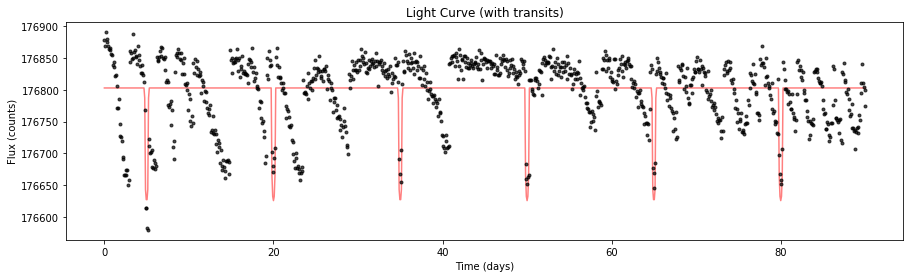

In [5]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,star.trn*np.mean(flux),'r',alpha=.5);
pl.plot(star.t,flux_tr,'k.',alpha=.7);
pl.title('Light Curve (with transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

The Detrend( ) function can be called with the light curve to remove the instrumental noise with second order PLD. Detrend( ) returns both the detrended and raw flux.

In [6]:
detrend, rawflux = star.Detrend(fpix_tr)

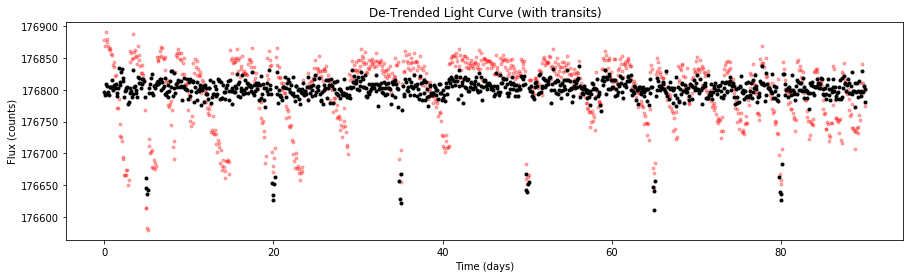

In [7]:
fig = pl.figure(figsize=(15,4))
pl.plot(star.t, rawflux, 'r.', alpha=.3);
pl.plot(star.t, detrend, 'k.');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');
pl.title('De-Trended Light Curve (with transits)');

# High Roll

To create a light curve with increased spacecraft roll, the $\texttt{roll}$ parameter (default to 1.0) can be changed in the GenerateLightCurve( ) function. Let's generate a light curve with 5.0x current spacecraft motion. To avoid flux loss off the edge of the aperture, the $\texttt{apsize}$ parameter has been increased to 9 (from default 7).

In [8]:
star = skope.Target()
highroll_fpix, highroll_flux, highroll_ferr = star.GenerateLightCurve(12., roll=5., apsize=9)

100%|██████████| 1000/1000 [01:32<00:00, 10.83it/s]


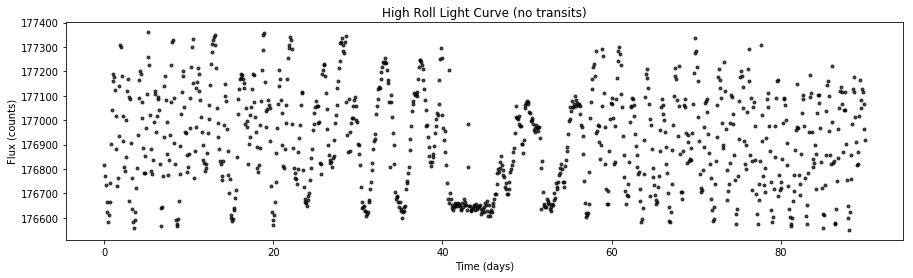

In [9]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,highroll_flux,'k.', alpha=.7);
pl.title('High Roll Light Curve (no transits)')
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

In [10]:
hr_fpix_tr, hr_flux_tr = star.AddTransit(highroll_fpix)

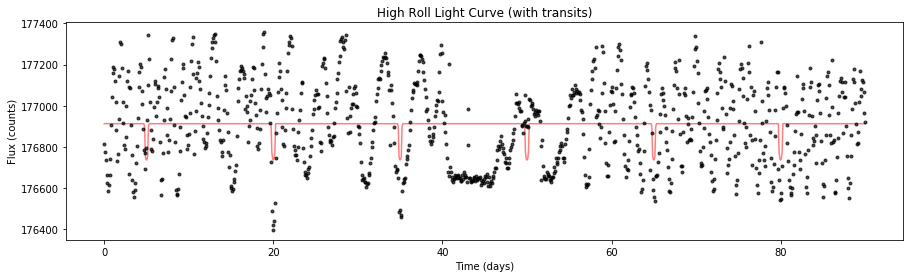

In [11]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,star.trn*np.mean(highroll_flux),'r', alpha=0.5);
pl.plot(star.t,hr_flux_tr,'k.',alpha=.7);
pl.title('High Roll Light Curve (with transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

In [12]:
detrend_hr, rawflux_hr = star.Detrend(hr_fpix_tr)

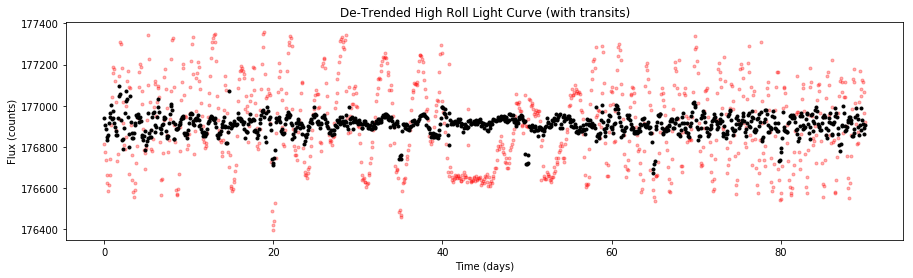

In [13]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,rawflux_hr,'r.',alpha=.3);
pl.plot(star.t,detrend_hr,'k.');
pl.title('De-Trended High Roll Light Curve (with transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

# Variability

A target can also be initialized with variability and transits (with default parameters). Variability is a sinusoidal function with given amplitude and frequency.

In [14]:
star = skope.Target(transit=True, variable=True)
fpix_v, flux_v, ferr_v = star.GenerateLightCurve(12.)

100%|██████████| 1000/1000 [00:54<00:00, 18.30it/s]


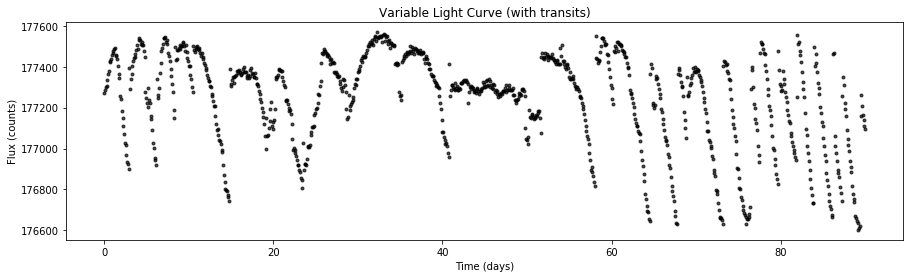

In [15]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,flux_v,'k.', alpha=.7);
pl.title('Variable Light Curve (with transits)')
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

In [16]:
detrend_v, rawflux_v = star.Detrend(fpix_v)

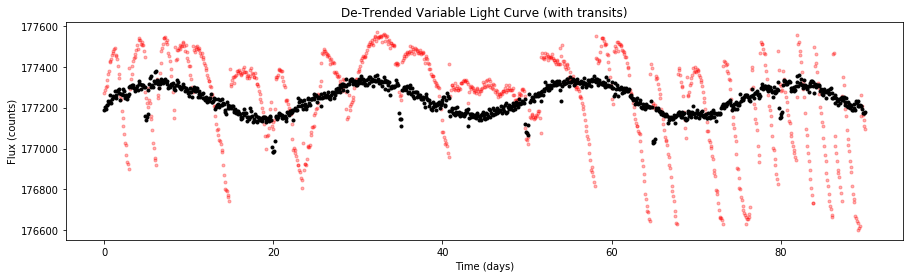

In [17]:
fig = pl.figure(figsize=(15,4));
pl.plot(star.t,rawflux_v,'r.',alpha=.3);
pl.plot(star.t,detrend_v,'k.');
pl.title('De-Trended Variable Light Curve (with transits)');
pl.xlabel('Time (days)');
pl.ylabel('Flux (counts)');

# Detector

The CCD detector (with given parameters, or default if no parameters given) can be displayed with the DisplayDetector( ) function.

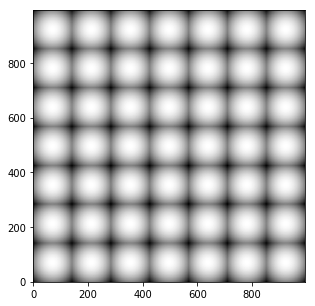

In [18]:
fig = pl.figure(figsize=(5,5))
det = star.DisplayDetector()